In [1889]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import random
import matplotlib.pyplot as plt
from datetime import datetime, time
from matplotlib.offsetbox import AnchoredText
import matplotlib.ticker as mtick
pd.set_option('display.max_rows', 10)
plt.style.use('bmh')
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'figure.figsize': (7, 7),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'
         }
pylab.rcParams.update(params)
pylab.rcParams['xtick.major.pad']='10'
pylab.rcParams['ytick.major.pad']='10'

In [1293]:
df = pd.read_csv('2018-2019 Game Log Playoffs.csv')
df.head()
df = df.drop(df.columns[[0]], axis = 1)
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
pd.set_option('display.max_columns', None)
df['TSA'] = round(df['FGA']+0.44*df['FTA'],1)
df['TS%'] = round(df['PTS']/(2*(df['TSA'])),3)
df['Games Played'] = df.groupby('NAME').cumcount() + 1
#Only looking at data of players who played significant time
df['mins'] = df['MP'].apply(lambda x: x.split(":")[0])
df['mins'] = df['mins'].astype(float)
df = df[df['mins']>12] 
df

,NAME,DATE,AGE,TEAM,HOME/AWAY,OPPONENT,RESULT,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GAME_SCORE,+/-,TSA,TS%,Games Played,mins
0,Aron Baynes,2019-04-14,32-126,BOS,HOME,IND,W (+10),1,22:56,1,2,0.500,0,0,NaN,0,0,NaN,2,7,9,0,0,1,1,4,2,2.6,0,2.0,0.500,1,22.0
1,Aron Baynes,2019-04-17,32-129,BOS,HOME,IND,W (+8),1,14:36,2,2,1.000,1,1,1.000,0,0,NaN,0,2,2,2,0,1,1,3,5,4.9,-8,2.0,1.250,2,14.0
2,Aron Baynes,2019-04-19,32-131,BOS,AWAY,IND,W (+8),1,21:10,1,3,0.333,0,1,0.000,0,0,NaN,2,1,3,1,1,0,1,3,2,1.5,1,3.0,0.333,3,21.0
3,Aron Baynes,2019-04-21,32-133,BOS,AWAY,IND,W (+4),1,18:16,1,1,1.000,0,0,NaN,0,0,NaN,0,2,2,0,1,0,1,2,2,1.5,-3,1.0,1.000,4,18.0
9,Aron Baynes,2019-04-14,32-126,BOS,HOME,IND,W (+10),1,22:56,1,2,0.500,0,0,NaN,0,0,NaN,2,7,9,0,0,1,1,4,2,2.6,0,2.0,0.500,10,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,Ricky Rubio,2019-04-20,28-181,UTA,HOME,HOU,L (-3),1,30:41,3,6,0.500,0,2,0.000,4,6,0.667,0,4,4,6,2,0,5,3,10,7.4,4,8.6,0.581,3,30.0
1748,Ricky Rubio,2019-04-22,28-183,UTA,HOME,HOU,W (+16),1,38:38,6,17,0.353,1,7,0.143,5,6,0.833,1,2,3,11,1,1,3,3,18,14.6,15,19.6,0.459,4,38.0
1749,Ricky Rubio,2019-04-24,28-185,UTA,AWAY,HOU,L (-7),1,34:53,7,15,0.467,1,5,0.200,2,2,1.000,0,2,2,11,3,0,3,3,17,16.4,2,15.9,0.535,5,34.0
1750,Thabo Sefolosha,2019-04-14,34-347,UTA,AWAY,HOU,L (-32),0,14:49,1,6,0.167,1,4,0.250,0,0,NaN,0,1,1,1,0,0,0,0,3,0.2,-18,6.0,0.250,1,14.0


In [945]:
df2 = pd.read_csv('2019-2020 Game Log Playoffs.csv')
df2.drop_duplicates(subset=['NAME', 'DATE'], keep='first',inplace=True)
df2 = df2.drop(df2.columns[[0]], axis = 1)
cols2 = df2.columns.tolist()
cols2 = cols2[-1:] + cols2[:-1]
df2 = df2[cols2]
pd.set_option('display.max_columns', None)
df2['TS%'] = round(df2['PTS']/(2*(df2['FGA']+0.44*df2['FTA'])),3)
df2['Games Played'] = df2.groupby('NAME').cumcount() + 1
#Only looking at data of players who played significant time
df2['mins'] = df2['MP'].apply(lambda x: x.split(":")[0])
df2['mins'] = df2['mins'].astype(float)
df2 = df2[df2['mins']>12]
df2

,NAME,DATE,AGE,TEAM,HOME/AWAY,OPPONENT,RESULT,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GAME_SCORE,+/-,TS%,Games Played,mins
0,Jaylen Brown,2020-08-17,23-298,BOS,HOME,PHI,W (+8),1,38:52,9,16,0.563,5,8,0.625,6,6,1.000,2,4,6,4,3,0,2,4,29,26.2,-1.0,0.778,1,38.0
1,Jaylen Brown,2020-08-19,23-300,BOS,HOME,PHI,W (+27),1,28:26,6,13,0.462,2,7,0.286,6,6,1.000,2,3,5,1,0,1,0,2,20,16.2,10.0,0.639,2,28.0
2,Jaylen Brown,2020-08-21,23-302,BOS,AWAY,PHI,W (+8),1,41:43,6,16,0.375,1,5,0.200,8,9,0.889,0,7,7,3,0,0,3,1,21,12.6,10.0,0.526,3,41.0
3,Jaylen Brown,2020-08-23,23-304,BOS,AWAY,PHI,W (+4),1,41:00,6,15,0.400,2,9,0.222,2,3,0.667,0,5,5,2,1,0,5,3,16,5.2,-2.0,0.490,4,41.0
4,Jaylen Brown,2020-08-30,23-311,BOS,AWAY,TOR,W (+18),1,31:17,6,18,0.333,3,9,0.333,2,3,0.667,0,5,5,4,0,0,2,5,17,6.7,10.0,0.440,5,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,Royce O'Neale,2020-08-21,27-077,UTA,HOME,DEN,W (+37),1,27:44,1,3,0.333,1,2,0.500,0,0,NaN,2,6,8,4,1,0,4,2,3,3.5,14.0,0.500,3,27.0
1693,Royce O'Neale,2020-08-23,27-079,UTA,HOME,DEN,W (+2),1,36:55,1,3,0.333,1,2,0.500,1,2,0.500,0,5,5,1,0,0,1,5,4,1.1,-12.0,0.515,4,36.0
1694,Royce O'Neale,2020-08-25,27-081,UTA,AWAY,DEN,L (-10),1,36:57,4,6,0.667,2,4,0.500,0,0,NaN,1,3,4,3,3,0,4,5,10,8.1,-18.0,0.833,5,36.0
1695,Royce O'Neale,2020-08-30,27-086,UTA,HOME,DEN,L (-12),1,38:18,1,4,0.250,1,3,0.333,2,4,0.500,0,3,3,2,1,0,2,3,5,1.9,-3.0,0.434,6,38.0


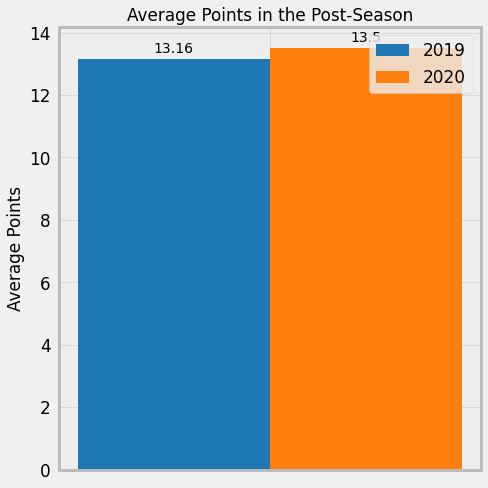

In [1210]:
labels = ['']
x=np.arange(len(labels))
width=0.35

pts1 = round(np.mean(df['PTS']),2)
pts2 = round(np.mean(df2['PTS']),2)

fig, ax = plt.subplots(figsize=(7,7))

rects1 = ax.bar(x-width/2,pts1, width, color='tab:blue',label='2019')
rects2 = ax.bar(x+width/2,pts2, width, color='tab:orange',label='2020')

ax.set_ylabel('Average Points')
ax.set_title('Average Points in the Post-Season')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)



fig.tight_layout()
plt.show()


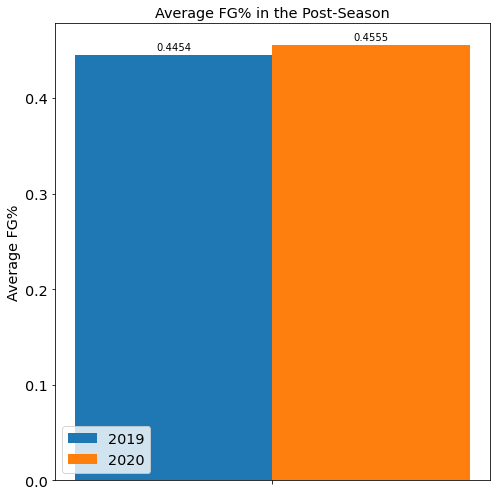

In [516]:
labels = ['']
x=np.arange(len(labels))
width=0.35

fg1 = round(np.mean(df['FG%']),4)
fg2 = round(np.mean(df2['FG%']),4)

fig, ax = plt.subplots(figsize=(7,7))

rects1 = ax.bar(x-width/2,fg1, width, color='tab:blue',label='2019')
rects2 = ax.bar(x+width/2,fg2, width, color='tab:orange',label='2020')

ax.set_ylabel('Average FG%')
ax.set_title('Average FG% in the Post-Season')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc=3)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)



fig.tight_layout()
plt.show()


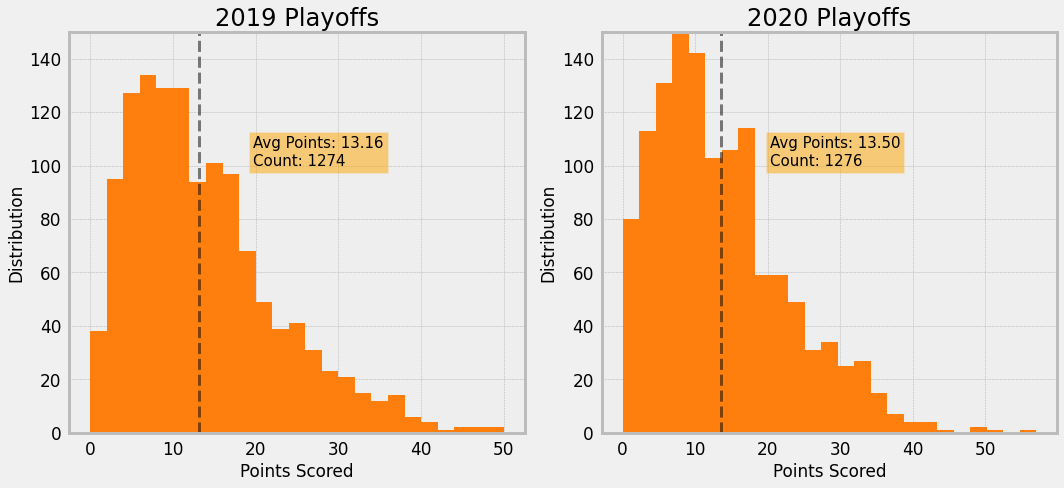

In [1211]:
df = df[df['mins']>12]
df2 = df2[df2['mins']>12] 
pts = np.array(df['PTS'])
mean = np.mean(pts)
count = len(df[df['mins']>12])


pts2 = np.array(df2['PTS'])
mean2 = np.mean(pts)
count2 = len(df2[df2['mins']>12])

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,7))

#df1
ax1.hist(pts,bins=25,color='tab:orange')
ax1.set_ylabel('Distribution')
ax1.set_xlabel('Points Scored')
ax1.set_title('2019 Playoffs', fontsize='xx-large')
ax1.set_ylim(0,150)
ax1.axvline(pts.mean(), color='k', linestyle='dashed', linewidth=3, alpha=0.5)
ax1.text(pts.mean()*1.5, 100, 'Avg Points: {:.2f}\nCount: {}'.format(pts.mean(),count),bbox=dict(facecolor='orange', alpha=0.5),fontsize=15)


#df2
ax2.hist(pts2,bins=25,color='tab:orange')
ax2.set_ylabel('Distribution')
ax2.set_xlabel('Points Scored')
ax2.set_title('2020 Playoffs', fontsize='xx-large')
ax2.set_ylim(0,150)
ax2.axvline(pts2.mean(), color='k', linestyle='dashed', linewidth=3, alpha=0.5)
ax2.text(pts2.mean()*1.5, 100, 'Avg Points: {:.2f}\nCount: {}'.format(pts2.mean(),count2),bbox=dict(facecolor='orange', alpha=0.5),fontsize=15)


fig.tight_layout()

# Takeaway: More instances of players playing over 12 mins in the Bubble environment, 
# with a higher average Points Scored



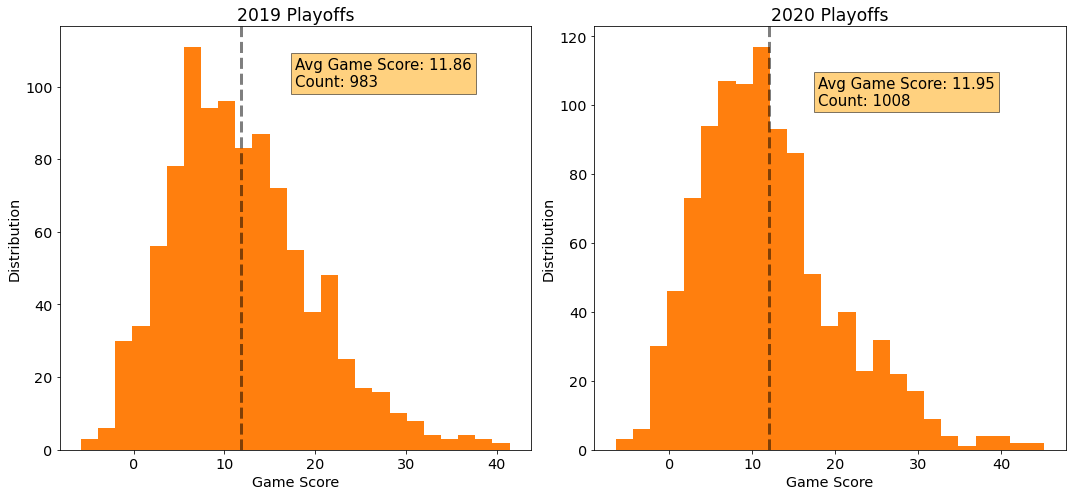

In [503]:
gs = np.array(df['GAME_SCORE'])
mean = np.mean(gs)
count = len(df)


gs2 = np.array(df2['GAME_SCORE'])
mean2 = np.mean(gs2)
count2 = len(df2)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,7))

#df1
ax1.hist(gs,bins=25,color='tab:orange')
ax1.set_ylabel('Distribution')
ax1.set_xlabel('Game Score')
ax1.set_title('2019 Playoffs', fontsize='xx-large')
#ax1.set_ylim(0,150)
ax1.axvline(gs.mean(), color='k', linestyle='dashed', linewidth=3, alpha=0.5)
ax1.text(gs.mean()*1.5, 100, 'Avg Game Score: {:.2f}\nCount: {}'.format(gs.mean(),count),bbox=dict(facecolor='orange', alpha=0.5),fontsize=15)


#df2
ax2.hist(gs2,bins=25,color='tab:orange')
ax2.set_ylabel('Distribution')
ax2.set_xlabel('Game Score')
ax2.set_title('2020 Playoffs', fontsize='xx-large')
#ax2.set_ylim(0,150)
ax2.axvline(gs2.mean(), color='k', linestyle='dashed', linewidth=3, alpha=0.5)
ax2.text(gs2.mean()*1.5, 100, 'Avg Game Score: {:.2f}\nCount: {}'.format(gs2.mean(),count2),bbox=dict(facecolor='orange', alpha=0.5),fontsize=15)


fig.tight_layout()

# Takeaway: 



{'whiskers': [<matplotlib.lines.Line2D at 0x1a24588510>,
 'caps': [<matplotlib.lines.Line2D at 0x1a24588d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a24588150>,
 'medians': [<matplotlib.lines.Line2D at 0x1a24593690>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a24593a90>,
 'means': []}

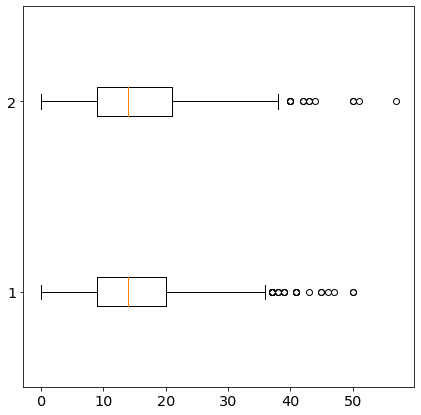

In [361]:
#Box Plot
fig, ax = plt.subplots()
ax.boxplot([pts,pts2], vert=False)

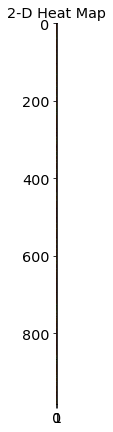

In [282]:
from  matplotlib.colors import LinearSegmentedColormap
c = ["firebrick","indianred","darkorange","khaki", "yellowgreen","mediumseagreen","darkgreen"]
v = [0,.15,.4,.5,0.6,.9,1.]
l = list(zip(v,c))
cmap=LinearSegmentedColormap.from_list('rg',l, N=256)

 
plt.imshow( data , cmap = cmap , interpolation = 'nearest' ) 
  
plt.title( "2-D Heat Map" ) 
plt.show() 

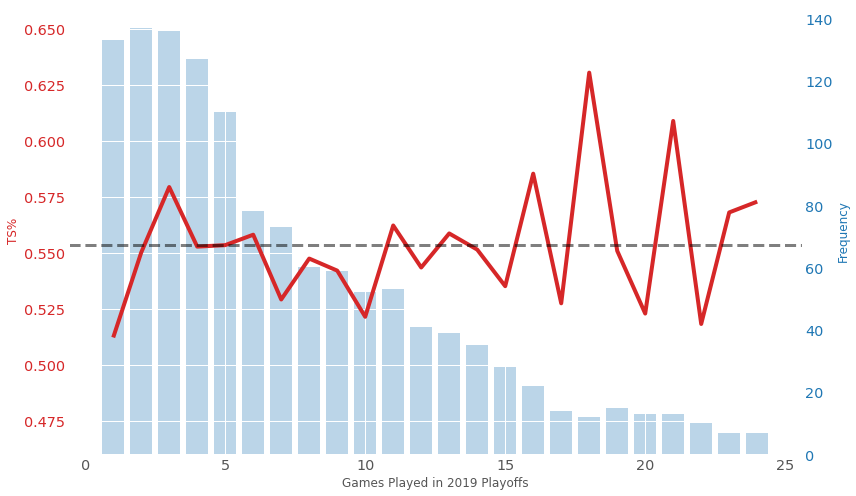

In [1195]:
#True Shooting Over the Course of the Playoffs
with plt.style.context('ggplot'):
    fig, ax1 = plt.subplots(figsize=(12,7))
    x = df.groupby(['Games Played']).size().reset_index()
    x.columns = ['GP','Count']
    gp_num = df.groupby(['Games Played']).size()

    ts = df.groupby(['Games Played']).aggregate(np.mean)['TS%']


    color = 'tab:red'
    ax1.set_ylim(0.46,0.66)
    ax1.set_xlabel('Games Played in 2019 Playoffs')
    ax1.set_ylabel('TS%', color=color)
    ax1.plot(x['GP'], ts, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.axhline(ts.mean(), color='k', linestyle='dashed', linewidth=3, alpha=0.5)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color2 = 'tab:blue'
    ax2.set_ylabel('Frequency', color=color2)  # we already handled the x-label with ax1
    ax2.bar(x['GP'], gp_num, color=color2,alpha=0.3)
    ax2.tick_params(axis='y', labelcolor=color2)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    ax1.set_zorder(1)  # default zorder is 0 for ax1 and ax2
    ax1.patch.set_visible(False)  # prevents ax1 from hiding ax2
plt.show()

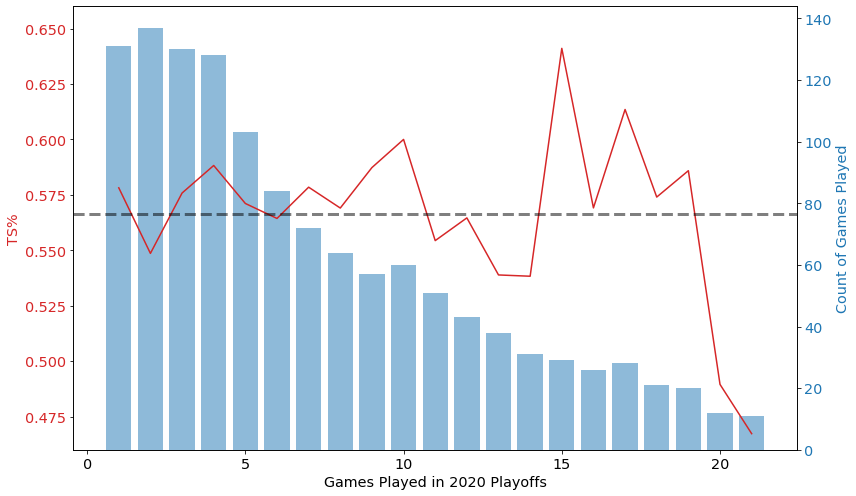

In [494]:
#True Shooting Over the Course of the Playoffs
fig, ax1 = plt.subplots(figsize=(12,7))
x2 = df2.groupby(['Games Played']).size().reset_index()
x2.columns = ['GP','Count']
gp_num2 = df2.groupby(['Games Played']).size()

ts2 = df2.groupby(['Games Played']).aggregate(np.mean)['TS%']


color = 'tab:red'
ax1.set_ylim(0.46,0.66)
ax1.set_xlabel('Games Played in 2020 Playoffs')
ax1.set_ylabel('TS%', color=color)
ax1.plot(x2['GP'], ts2, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.axhline(ts2.mean(), color='k', linestyle='dashed', linewidth=3, alpha=0.5)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color2 = 'tab:blue'
ax2.set_ylabel('Count of Games Played', color=color2)  # we already handled the x-label with ax1
ax2.bar(x2['GP'], gp_num2, color=color2,alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color2)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.set_zorder(1)  # default zorder is 0 for ax1 and ax2
ax1.patch.set_visible(False)  # prevents ax1 from hiding ax2
plt.show()

# Home Advantage: Regular Season '20 vs Playoffs '20

In [895]:
playoffs2020 = ['BOS','BRK','DAL','DEN','HOU','IND','LAC','LAL','MIA','MIL','OKC','ORL','PHI','POR','TOR','UTA']


In [1256]:
df3 = pd.read_csv('2019-2020 Game Log.csv')
df3 = df3.drop(df3.columns[[0]], axis = 1)
cols3 = df3.columns.tolist()
cols3 = cols3[-1:] + cols3[:-1]
df3 = df3[cols3]
df3['TSA'] = round(df3['FGA']+0.44*df3['FTA'],1)
df3['TS%'] = round(df3['PTS']/(2*(df3['TSA'])),3)

pd.set_option('display.max_columns', None)
df3 = df3.loc[df3['TEAM'].isin(playoffs2020)]
df3

,NAME,DATE,AGE,TEAM,HOME/AWAY,OPPONENT,RESULT,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GAME_SCORE,+/-,TSA,TS%
847,Paul Watson,2020-01-31,25-032,TOR,AWAY,DET,W (+13),0,1:33,0,0,NaN,0,0,NaN,0,0,NaN,0,0,0,0,0,0,0,0,0,0.0,-6.0,0.0,NaN
848,Paul Watson,2020-02-02,25-034,TOR,HOME,CHI,W (+27),0,3:12,0,0,NaN,0,0,NaN,1,2,0.5,0,1,1,1,0,0,0,0,1,1.6,3.0,0.9,0.556
849,Paul Watson,2020-02-23,25-055,TOR,HOME,IND,W (+46),0,3:36,0,1,0.000,0,1,0.0,0,0,NaN,0,1,1,1,0,1,0,0,0,1.0,4.0,1.0,0.000
850,Paul Watson,2020-08-01,25-215,TOR,HOME,LAL,W (+15),0,1:27,0,0,NaN,0,0,NaN,0,0,NaN,0,0,0,0,0,0,0,0,0,0.0,-1.0,0.0,NaN
851,Paul Watson,2020-08-07,25-221,TOR,HOME,BOS,L (-22),0,5:52,0,0,NaN,0,0,NaN,0,0,NaN,0,2,2,0,0,0,0,1,0,0.2,13.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21092,Nigel Williams-Goss,2020-08-13,25-332,UTA,HOME,SAS,W (+6),0,22:11,4,9,0.444,2,5,0.4,0,0,NaN,0,1,1,1,2,0,1,4,10,5.7,-4.0,9.0,0.556
21093,Justin Wright-Foreman,2020-02-21,22-117,UTA,HOME,SAS,L (-9),0,1:32,0,0,NaN,0,0,NaN,0,0,NaN,0,0,0,0,0,0,0,0,0,0.0,2.0,0.0,NaN
21094,Justin Wright-Foreman,2020-08-07,22-285,UTA,AWAY,SAS,L (-8),0,11:24,3,8,0.375,0,3,0.0,2,2,1.0,0,2,2,1,1,0,2,1,8,3.5,2.0,8.9,0.449
21095,Justin Wright-Foreman,2020-08-10,22-288,UTA,HOME,DAL,L (-8),0,15:16,2,5,0.400,2,4,0.5,1,2,0.5,0,1,1,3,0,0,0,2,7,5.5,-23.0,5.9,0.593


In [901]:
#Game Log of 2020 Games with Home/Away, Result, and Margin
glog_19 = df3.groupby(['TEAM','DATE']).first()
#glog_19 = wlog_19.set_index(['TEAM','DATE'])
glog_19 = glog_19[['HOME/AWAY','RESULT']]
glog_19['MARGIN'] = glog_19['RESULT'].apply(lambda x: x.split("(")[1])
glog_19['MARGIN'] = glog_19['MARGIN'].apply(lambda x: x.split(")")[0])
glog_19['RESULT'] = glog_19['RESULT'].apply(lambda x: x.split(" ")[0])
glog_19

HOME/AWAY RESULT MARGIN
TEAM DATE                              
BOS  2019-10-23      AWAY      L    -14
     2019-10-25      HOME      W     +6
     2019-10-26      AWAY      W    +23
     2019-10-30      HOME      W    +11
     2019-11-01      HOME      W     +2
...                   ...    ...    ...
UTA  2020-08-05      HOME      W     +9
     2020-08-07      AWAY      L     -8
     2020-08-08      AWAY      L     -2
     2020-08-10      HOME      L     -8
     2020-08-13      HOME      W     +6

[1129 rows x 3 columns]

In [902]:
#binomial
wlog_19 = glog_19[glog_19['HOME/AWAY']=='HOME']
wlog_19 = wlog_19[wlog_19['RESULT']=='W']
wlog_19 = wlog_19['MARGIN'].apply(lambda x: x.split("+")[1])
wlog_19 = wlog_19.astype(float)
wlog_19.mean()

13.126984126984127

In [903]:
#AWAY WINS, REG SEASON 2020
wlog2_19 = glog_19[glog_19['HOME/AWAY']=='AWAY']
wlog2_19 = wlog2_19[wlog2_19['RESULT']=='W']
wlog2_19 = wlog2_19['MARGIN'].apply(lambda x: x.split("+")[1])
wlog2_19 = wlog2_19.astype(float)
wlog2_19.mean()

10.567307692307692

In [904]:
llog_19 = glog_19[glog_19['HOME/AWAY']=='HOME']
llog_19 = llog_19[llog_19['RESULT']=='L']
llog_19 = llog_19['MARGIN']
llog_19 = llog_19.astype('float')
llog_19.mean()

-9.86111111111111

In [905]:
#AWAY LOSSES, REG SEASON 2020
llog2_19 = glog_19[glog_19['HOME/AWAY']=='AWAY']
llog2_19 = llog2_19[llog2_19['RESULT']=='L']
llog2_19 = llog2_19['MARGIN']
llog2_19 = llog2_19.astype('float')
llog2_19.mean()

-10.49034749034749

In [906]:
log_19 = wlog_19.add(llog_19,fill_value=0)
log_19.mean()


5.711469534050179

In [907]:
log2_19 = wlog2_19.add(llog2_19,fill_value=0)
log2_19.mean()

1.0157618213660244

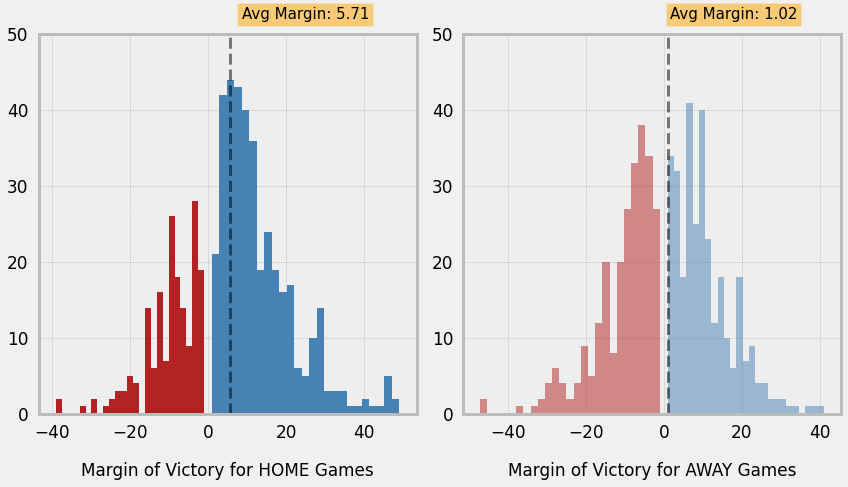

In [1921]:
#Higher Win Rate at Home, normal distribution
#Sample would be Home and Margin
fig, axs = plt.subplots(1,2, figsize=(12,7))

axs[0].set_ylim(0,50)
axs[0].set_xlabel('Margin of Victory for HOME Games')
axs[0].hist(wlog_19,bins=25,color='steelblue')
axs[0].hist(llog_19,bins=25,color='firebrick')
axs[0].axvline(log_19.mean(), color='k', linestyle='dashed', linewidth=3, alpha=0.5)
axs[0].text(log_19.mean()*1.5, 52, 'Avg Margin: {:.2f}'.format(log_19.mean()),bbox=dict(facecolor='orange', alpha=0.5),fontsize=15)
axs[0].xaxis.labelpad = 20

axs[1].set_ylim(0,50)
axs[1].set_xlabel('Margin of Victory for AWAY Games')
axs[1].hist(wlog2_19,bins=25,color='steelblue', alpha=0.5)
axs[1].hist(llog2_19,bins=25,color='firebrick',alpha=0.5)
axs[1].axvline(log2_19.mean(), color='k', linestyle='dashed', linewidth=3, alpha=0.5)
axs[1].text(log2_19.mean()*1.5, 52, 'Avg Margin: {:.2f}'.format(log2_19.mean()),bbox=dict(facecolor='orange', alpha=0.5),fontsize=15)
axs[1].xaxis.labelpad = 20


fig.tight_layout()
fig.savefig('test')


# 2020 Playoff Game Log

In [964]:
#2019-2020 Playoff Log
df4 = pd.read_csv('2019-2020 Game Log Playoffs.csv')
df4 = df4.loc[:, ~df4.columns.str.contains('^Unnamed')]
#df4 = df4.drop(df4.columns[[0]], axis = 1)
cols4 = df4.columns.tolist()
cols4 = cols4[-1:] + cols4[:-1]
df4 = df4[cols4]
df4['TSA'] = round(df4['FGA']+0.44*df4['FTA'],1)
df4['TS%'] = round(df4['PTS']/(2*(df4['TSA'])),3)
pd.set_option('display.max_columns', None)
df4;

In [692]:
#Game Log of 2020 Games with Home/Away, Result, and Margin
glog_20 = df4.groupby(['TEAM','DATE']).first()
#glog_19 = wlog_19.set_index(['TEAM','DATE'])
glog_20 = glog_20[['HOME/AWAY','RESULT']]
glog_20['MARGIN'] = glog_20['RESULT'].apply(lambda x: x.split("(")[1])
glog_20['MARGIN'] = glog_20['MARGIN'].apply(lambda x: x.split(")")[0])
glog_20['RESULT'] = glog_20['RESULT'].apply(lambda x: x.split(" ")[0])
glog_20;

In [916]:
#Home Wins Log for 2020 Playoffs
#binomial
wlog_20 = glog_20[glog_20['HOME/AWAY']=='HOME']
wlog_20 = wlog_20[wlog_20['RESULT']=='W']
wlog_20 = wlog_20['MARGIN'].apply(lambda x: x.split("+")[1])
wlog_20 = wlog_20.astype(int)
wlog_20

TEAM  DATE      
BOS   2020-08-17     8
      2020-08-19    27
      2020-09-25    13
DAL   2020-08-23     2
DEN   2020-08-17    10
                    ..
OKC   2020-08-31     4
TOR   2020-08-17    24
      2020-08-19     5
UTA   2020-08-21    37
      2020-08-23     2
Name: MARGIN, Length: 40, dtype: int64

In [917]:
#Home Losses Log for 2020 Playoffs
llog_20 = glog_20[glog_20['HOME/AWAY']=='HOME']
llog_20 = llog_20[llog_20['RESULT']=='L']
llog_20 = llog_20['MARGIN']
llog_20 = llog_20.astype('float')
llog_20

TEAM  DATE      
BOS   2020-09-03    -1.0
      2020-09-05    -7.0
      2020-09-09    -3.0
      2020-09-15    -3.0
      2020-09-17    -5.0
                    ... 
TOR   2020-08-30   -18.0
      2020-09-01    -3.0
      2020-09-07   -22.0
      2020-09-11    -5.0
UTA   2020-08-30   -12.0
Name: MARGIN, Length: 43, dtype: float64

In [694]:
#Away Wins Log for 2020 Playoffs
wlog2_20 = glog_20[glog_20['HOME/AWAY']=='AWAY']
wlog2_20 = wlog2_20[wlog2_20['RESULT']=='W']
wlog2_20 = wlog2_20['MARGIN'].apply(lambda x: x.split("+")[1])
wlog2_20 = wlog2_20.astype(int)
wlog2_20.mean()

10.255813953488373

In [699]:
#Away Losses Log for 2020 Playoffs
llog2_20 = glog_20[glog_20['HOME/AWAY']=='AWAY']
llog2_20 = llog2_20[llog2_20['RESULT']=='L']
llog2_20 = llog2_20['MARGIN']
llog2_20 = llog2_20.astype('float')
llog2_20.mean()

-13.1

In [923]:
#Home W/L 2020 Playoffs
log_20 = wlog_20.add(llog_20,fill_value=0)
log_20.mean()

1.0

In [924]:
#Away W/L
log2_20 = wlog2_20.add(llog2_20,fill_value=0)
log2_20.mean()

-1.0

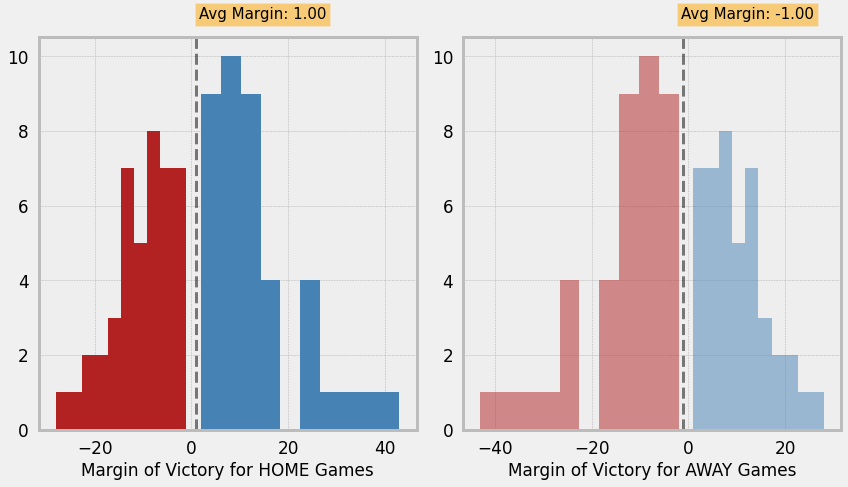

In [1896]:
#Higher Win Rate at Home, normal distribution
#Sample would be Home and Margin
fig, axs = plt.subplots(1,2, figsize=(12,7))
#axs[0].set_ylim(0,75)
axs[0].set_xlabel('Margin of Victory for HOME Games')
axs[0].hist(wlog_20,bins=10,color='steelblue')
axs[0].hist(llog_20,bins=10,color='firebrick')
axs[0].axvline(log_20.mean(), color='k', linestyle='dashed', linewidth=3, alpha=0.5)
axs[0].text(log_20.mean()*1.5, 11, 'Avg Margin: {:.2f}'.format(log_20.mean()),bbox=dict(facecolor='orange', alpha=0.5),fontsize=15)

#axs[1].set_ylim(0,75)
axs[1].set_xlabel('Margin of Victory for AWAY Games')
axs[1].hist(wlog2_20,bins=10,color='steelblue', alpha=0.5)
axs[1].hist(llog2_20,bins=10,color='firebrick',alpha=0.5)
axs[1].axvline(log2_20.mean(), color='k', linestyle='dashed', linewidth=3, alpha=0.5)
axs[1].text(log2_20.mean()*1.5, 11, 'Avg Margin: {:.2f}'.format(log2_20.mean()),bbox=dict(facecolor='orange', alpha=0.5),fontsize=15)


fig.tight_layout()

fig.savefig('Margin of Victory for Playoff Teams in 2020 Post Season')

# 2019 Playoff Game Log

In [737]:
#2018-2019 Playoff Log
p19 = pd.read_csv('2018-2019 Game Log Playoffs.csv')
p19 = p19.loc[:, ~p19.columns.str.contains('^Unnamed')]
#p19 = p19.drop(p19.columns[[1]], axis = 1)
cols5 = p19.columns.tolist()
cols5 = cols5[-1:] + cols5[:-1]
p19 = p19[cols5]
pd.set_option('display.max_columns', None)
p19;

In [750]:
#Game Log of 2019 Games with Home/Away, Result, and Margin
plog_19 = p19.groupby(['TEAM','DATE']).first()
#glog_19 = wlog_19.set_index(['TEAM','DATE'])
plog_19 = plog_19[['HOME/AWAY','RESULT']]
plog_19['MARGIN'] = plog_19['RESULT'].apply(lambda x: x.split("(")[1])
plog_19['MARGIN'] = plog_19['MARGIN'].apply(lambda x: x.split(")")[0])
plog_19['RESULT'] = plog_19['RESULT'].apply(lambda x: x.split(" ")[0])
plog_19;

In [764]:
#Home Wins Log for 2019 Playoffs
#binomial
pwlog_19 = plog_19[plog_19['HOME/AWAY']=='HOME']
pwlog_19 = pwlog_19[pwlog_19['RESULT']=='W']
pwlog_19 = pwlog_19['MARGIN'].apply(lambda x: x.split("+")[1])
pwlog_19 = pwlog_19.astype(int)
pwlog_19.mean()

14.152173913043478

In [758]:
#Away Wins Log for 2020 Playoffs
pwlog2_19 = plog_19[plog_19['HOME/AWAY']=='AWAY']
pwlog2_19 = pwlog2_19[pwlog2_19['RESULT']=='W']
pwlog2_19 = pwlog2_19['MARGIN'].apply(lambda x: x.split("+")[1])
pwlog2_19 = pwlog2_19.astype(int)
pwlog2_19.mean()

9.38888888888889

In [759]:
#Home Losses Log for 2019 Playoffs
pllog_19 = plog_19[plog_19['HOME/AWAY']=='HOME']
pllog_19 = pllog_19[pllog_19['RESULT']=='L']
pllog_19 = pllog_19['MARGIN']
pllog_19 = pllog_19.astype('float')
pllog_19.mean()

-9.38888888888889

In [760]:
#Away Losses Log for 2019 Playoffs
pllog2_19 = plog_19[plog_19['HOME/AWAY']=='AWAY']
pllog2_19 = pllog2_19[pllog2_19['RESULT']=='L']
pllog2_19 = pllog2_19['MARGIN']
pllog2_19 = pllog2_19.astype('float')
pllog2_19.mean()

-14.152173913043478

In [769]:
phm_19 = pwlog_19.add(pllog_19,fill_value=0)
phm_19.mean()


3.817073170731707

In [768]:
pam_19 = pwlog2_19.add(pllog2_19,fill_value=0)
pam_19.mean()

-3.817073170731707

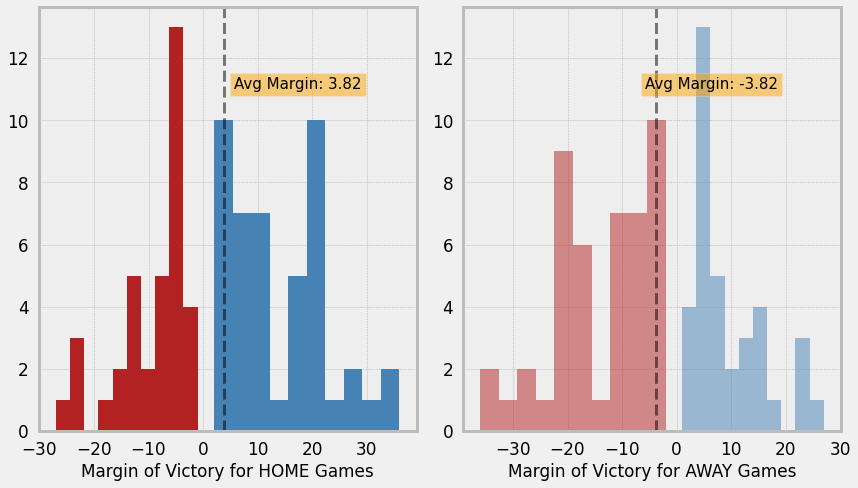

In [1897]:
#2018-2019 Playoffs Home/AWAY W/L

fig, axs = plt.subplots(1,2, figsize=(12,7))

#HOME
#axs[0].set_ylim(0,75)
axs[0].set_xlabel('Margin of Victory for HOME Games')
axs[0].hist(pwlog_19,bins=10,color='steelblue')
axs[0].hist(pllog_19,bins=10,color='firebrick')
axs[0].axvline(phm_19.mean(), color='k', linestyle='dashed', linewidth=3, alpha=0.5)
axs[0].text(phm_19.mean()*1.5, 11, 'Avg Margin: {:.2f}'.format(phm_19.mean()),bbox=dict(facecolor='orange', alpha=0.5),fontsize=15)

#AWAY
#axs[1].set_ylim(0,75)
axs[1].set_xlabel('Margin of Victory for AWAY Games')
axs[1].hist(pwlog2_19,bins=10,color='steelblue', alpha=0.5)
axs[1].hist(pllog2_19,bins=10,color='firebrick',alpha=0.5)
axs[1].axvline(pam_19.mean(), color='k', linestyle='dashed', linewidth=3, alpha=0.5)
axs[1].text(pam_19.mean()*1.5, 11, 'Avg Margin: {:.2f}'.format(pam_19.mean()),bbox=dict(facecolor='orange', alpha=0.5),fontsize=15)


fig.tight_layout()
fig.savefig('Margin of Victory for Playoff Teams in 2019 Post Season')

## Playoff Home Court Margin Pre Bubble vs Bubble

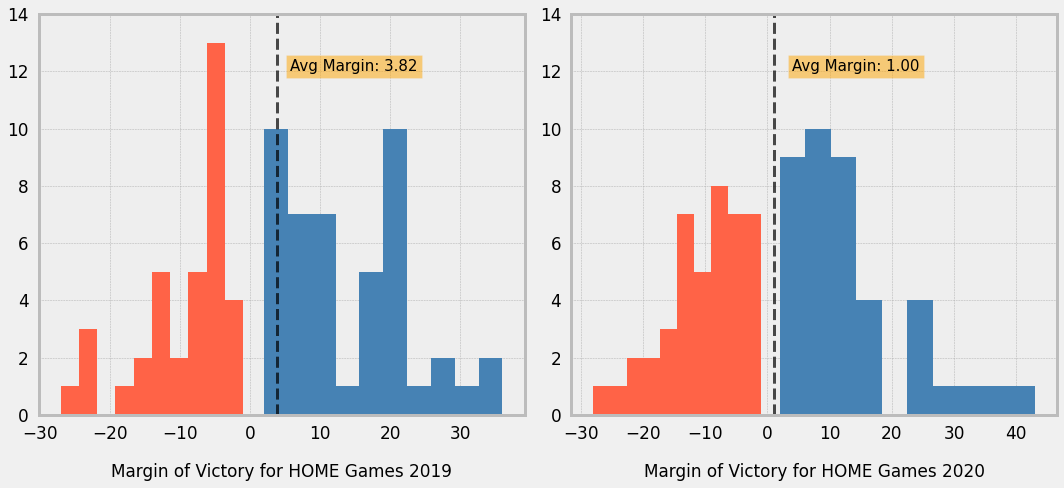

In [1898]:
fig, axs = plt.subplots(1,2, figsize=(15,7))

#HOME 2019
axs[0].set_ylim(0,14)
axs[0].set_xlabel('Margin of Victory for HOME Games 2019')
axs[0].hist(pwlog_19,bins=10,color='steelblue')
axs[0].hist(pllog_19,bins=10,color='tomato')
axs[0].axvline(phm_19.mean(), color='k', linestyle='dashed', linewidth=3, alpha=0.7)
axs[0].text(phm_19.mean()*1.5, 12, 'Avg Margin: {:.2f}'.format(phm_19.mean()),bbox=dict(facecolor='orange', alpha=0.5),fontsize=15)
axs[0].xaxis.labelpad = 20

#Home 2020
axs[1].set_ylim(0,14)
axs[1].set_xlabel('Margin of Victory for HOME Games 2020')
axs[1].hist(wlog_20,bins=10,color='steelblue')
axs[1].hist(llog_20,bins=10,color='tomato')
axs[1].axvline(log_20.mean(), color='k', linestyle='dashed', linewidth=3, alpha=0.7)
axs[1].text(log_20.mean()+3, 12, 'Avg Margin: {:.2f}'.format(log_20.mean()),bbox=dict(facecolor='orange', alpha=0.5),fontsize=15)
axs[1].xaxis.labelpad = 20

fig.tight_layout()
fig.savefig('Margin of Victory for Playoff Teams in 2019 and 2020 Post Season')

In [885]:
#h0: There is not a difference in Home Court Advantage in the 2020 Playoff Bubble compared to the 2019 Playoffs.
# Statistically, there is no significance in the data observed within the 2020 Playoff Bubble, but practically,
# it seems significant. This is most likely due to the subset of data when Game Logs were aggregated from
# a Player Level, to a Team Level. Further investigation would involve compiling more years of Regular Season
# and Playoff data to the data set.
phw20=wlog_20.astype(int)
phw19=pwlog_19.astype(int)
stats.ttest_ind(phw20,phw19)


Ttest_indResult(statistic=-0.5152802479446996, pvalue=0.6077106301720924)

In [796]:
np.std(phw20)

9.614572273377535

In [797]:
np.std(phw19)

9.084069647523547

# 2020 Regular Season Home Margin vs 2020 Playoff Home Margin

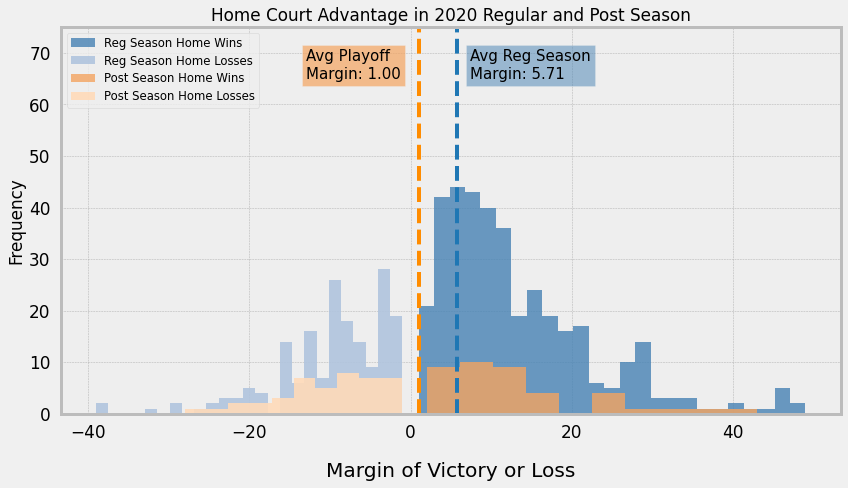

In [1819]:
fig, ax = plt.subplots(figsize=(12,7))
ax.set_title('Home Court Advantage in 2020 Regular and Post Season')
#HOME 2020 Regular Season
ax.set_ylim(0,75)
ax.set_ylabel('Frequency',size='large')
ax.set_xlabel('Margin of Victory or Loss',size='x-large')
ax.xaxis.labelpad = 20

ax.hist(wlog_19,bins=25,color='steelblue',alpha=0.8,label='Reg Season Home Wins')
ax.hist(llog_19,bins=25,color='lightsteelblue',alpha=0.9,label='Reg Season Home Losses')
ax.axvline(log_19.mean(), color='tab:blue', linestyle='dashed', linewidth=4, alpha=1)
ax.text(log_19.mean()*1.3, 65, 'Avg Reg Season\nMargin: {:.2f}'.format(log_19.mean()),bbox=dict(facecolor='steelblue', alpha=0.5),fontsize=15)

#Home 2020 Playoffs
ax.hist(wlog_20,bins=10,color='sandybrown',alpha=0.8,zorder=1,label='Post Season Home Wins')
ax.hist(llog_20,bins=10,color='peachpuff',alpha=0.9,zorder=2, label='Post Season Home Losses')
ax.axvline(log_20.mean(), color='darkorange', linestyle='dashed', linewidth=4, alpha=1)
ax.text(-13, 65, 'Avg Playoff \nMargin: {:.2f}'.format(log_20.mean()),bbox=dict(facecolor='sandybrown', alpha=0.7),fontsize=15)

ax.legend(fontsize='small',loc='upper left')
fig.tight_layout()
#plt.savefig('Home Court Advantage in 2020 Regular and Post Season')

In [1924]:
#h0: There is not a difference in Home Court Advantage in the 2020 Playoff Bubble compared to the 2020 Regular Season
# Statistically, there is no significance in the data observed within the 2020 Playoff Bubble. 
# Further investigation would involve compiling more Regular Season and Playoff to the data set. 
# T-Test gives difference of means, given the variance, compare that with 2019 Reg/Playoff Games
# Negative because Playoff margin is LESS, and small magnitude
phw20=wlog_20.astype(int)
rshw20=wlog_19.astype(int)
stats.ttest_ind(phw20,rshw20)


Ttest_indResult(statistic=-0.016625232446343757, pvalue=0.9867435652201463)

In [1925]:
np.std(phw20)

9.614572273377535

In [1926]:
np.std(rshw20)

9.751394522698492

# True Shooting In The Bubble

In [1669]:
#2019-2020 REGULAR SEASON
tsrs20=df3[['NAME','TEAM','DATE','FG','FGA','FG%','FT','FTA','FT%','3P','3PA','3P%','TSA','TS%']].dropna()

In [1933]:
round(tsrs20.describe().loc[['mean','std','min','25%','50%','75%','max']],3)

,FG,FGA,FG%,FT,FTA,FT%,3P,3PA,3P%,TSA,TS%
mean,5.438,11.755,0.452,3.193,3.999,0.784,1.732,4.733,0.343,13.520,0.582
std,3.413,6.109,0.174,2.667,3.038,0.272,1.602,2.946,0.267,6.842,0.183
min,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.400,0.000
25%,3.000,7.000,0.333,1.000,2.000,0.625,1.000,2.000,0.125,7.900,0.465
50%,5.000,11.000,0.462,2.000,3.000,0.875,1.000,4.000,0.333,12.400,0.581
75%,8.000,16.000,0.562,4.000,5.000,1.000,3.000,6.000,0.500,17.900,0.691
max,20.000,41.000,1.000,26.000,27.000,1.000,11.000,22.000,1.000,47.600,1.327


In [1163]:
tsrs20['NAME'].unique();

In [1086]:
tsrs20[tsrs20['TS%'] == tsrs20['TS%'].max()]

,NAME,TEAM,DATE,FG,FGA,FG%,FT,FTA,FT%,3P,3PA,3P%,TSA,TS%
8432,Ben McLemore,HOU,2020-07-31,4,4,1.0,1,2,0.5,4,4,1.0,4.9,1.327


In [1087]:
#2019-2020 PLAYOFFS
tsp20=df4[['NAME','TEAM','DATE','FG','FGA','FG%','FT','FTA','FT%','3P','3PA','3P%','TSA','TS%']].dropna()

In [1088]:
tsp20[tsp20['TS%'] == tsp20['TS%'].max()]

,NAME,TEAM,DATE,FG,FGA,FG%,FT,FTA,FT%,3P,3PA,3P%,TSA,TS%
1193,Duncan Robinson,MIA,2020-08-20,7,8,0.875,3,3,1.0,7,8,0.875,9.3,1.29


In [1158]:
tsp20['NAME'].count()

808

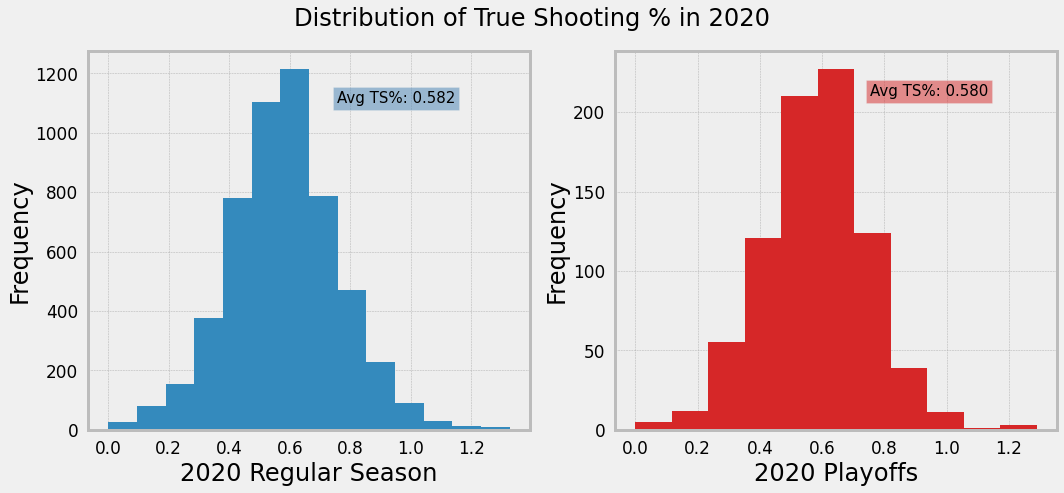

In [1375]:
fig, axs = plt.subplots(1,2, figsize=(15,7))


fig.suptitle('Distribution of True Shooting % in 2020',fontsize='xx-large')

axs[0].hist(tsrs20['TS%'],bins=14)
axs[0].set_ylabel('Frequency',fontsize='xx-large')
axs[0].set_xlabel('2020 Regular Season',fontsize='xx-large')
axs[0].text(tsrs20['TS%'].mean()*1.3, 1100, 'Avg TS%: {:.3f}'.format(tsrs20['TS%'].mean()),bbox=dict(facecolor='steelblue', alpha=0.5),fontsize=15)

axs[1].hist(tsp20['TS%'],bins=11, color='tab:red')
axs[1].set_ylabel('Frequency',fontsize='xx-large')
axs[1].set_xlabel('2020 Playoffs',fontsize='xx-large')
axs[1].text(tsp20['TS%'].mean()*1.3, 210, 'Avg TS%: {:.3f}'.format(tsp20['TS%'].mean()),bbox=dict(facecolor='tab:red', alpha=0.5),fontsize=15)


fig.tight_layout()

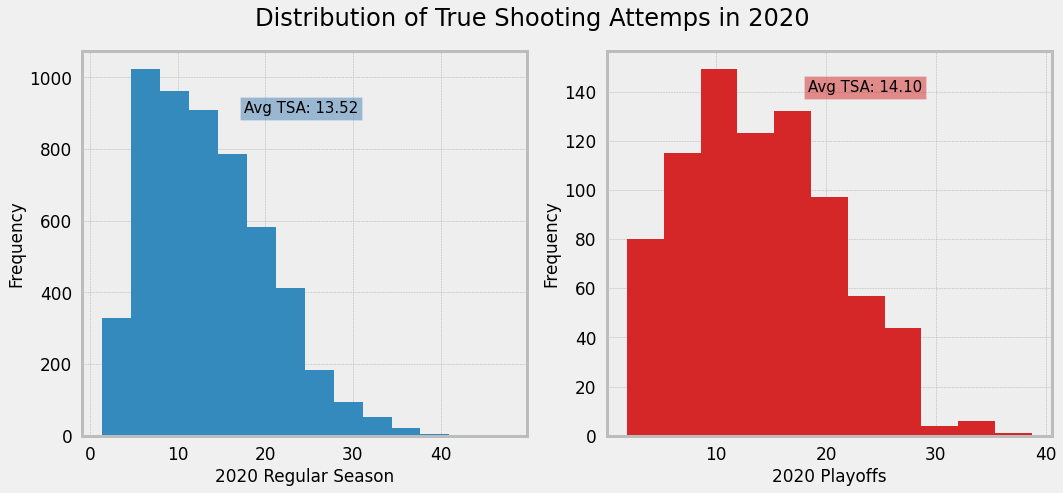

In [1376]:
fig, axs = plt.subplots(1,2, figsize=(15,7))


fig.suptitle('Distribution of True Shooting Attemps in 2020',fontsize='xx-large')
axs[0].hist(tsrs20['TSA'],bins=14)
axs[0].set_ylabel('Frequency',fontsize='large')
axs[0].set_xlabel('2020 Regular Season',fontsize='large')
axs[0].text(tsrs20['TSA'].mean()*1.3, 900, 'Avg TSA: {:.2f}'.format(tsrs20['TSA'].mean()),bbox=dict(facecolor='steelblue', alpha=0.5),fontsize=15)

axs[1].hist(tsp20['TSA'],bins=11, color='tab:red')
axs[1].set_ylabel('Frequency',fontsize='large')
axs[1].set_xlabel('2020 Playoffs',fontsize='large')
axs[1].text(tsp20['TSA'].mean()*1.3, 140, 'Avg TSA: {:.2f}'.format(tsp20['TSA'].mean()),bbox=dict(facecolor='tab:red', alpha=0.5),fontsize=15)


fig.tight_layout()

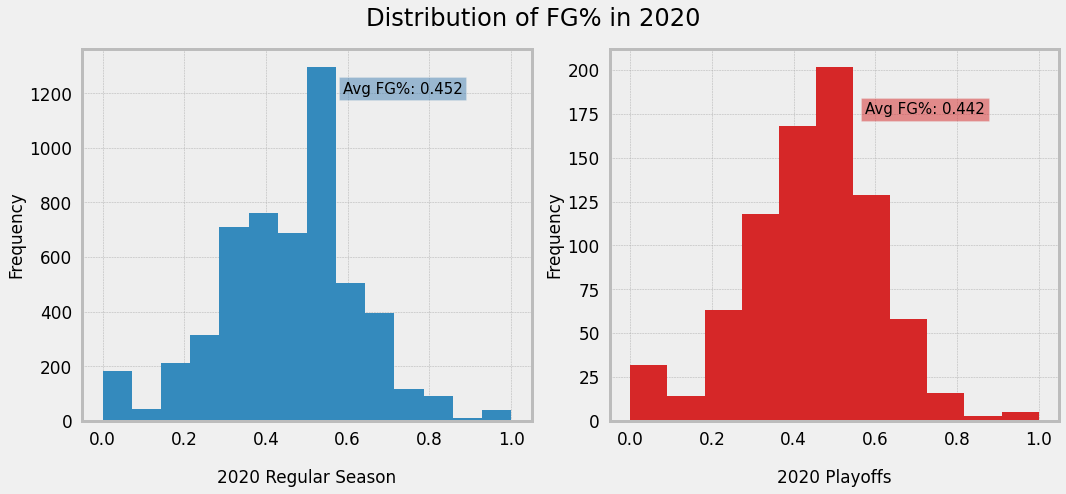

In [1377]:
fig, axs = plt.subplots(1,2, figsize=(15,7))


fig.suptitle('Distribution of FG% in 2020',fontsize='xx-large')
axs[0].hist(tsrs20['FG%'],bins=14)
axs[0].set_ylabel('Frequency',fontsize='large')
axs[0].set_xlabel('2020 Regular Season',fontsize='large')
axs[0].text(tsrs20['FG%'].mean()*1.3, 1200, 'Avg FG%: {:.3f}'.format(tsrs20['FG%'].mean()),bbox=dict(facecolor='steelblue', alpha=0.5),fontsize=15)
axs[0].xaxis.labelpad = 20

axs[1].hist(tsp20['FG%'],bins=11, color='tab:red')
axs[1].set_ylabel('Frequency',fontsize='large')
axs[1].set_xlabel('2020 Playoffs',fontsize='large')
axs[1].text(tsp20['FG%'].mean()*1.3, 175, 'Avg FG%: {:.3f}'.format(tsp20['FG%'].mean()),bbox=dict(facecolor='tab:red', alpha=0.5),fontsize=15)
axs[1].xaxis.labelpad = 20


fig.tight_layout(pad=1)

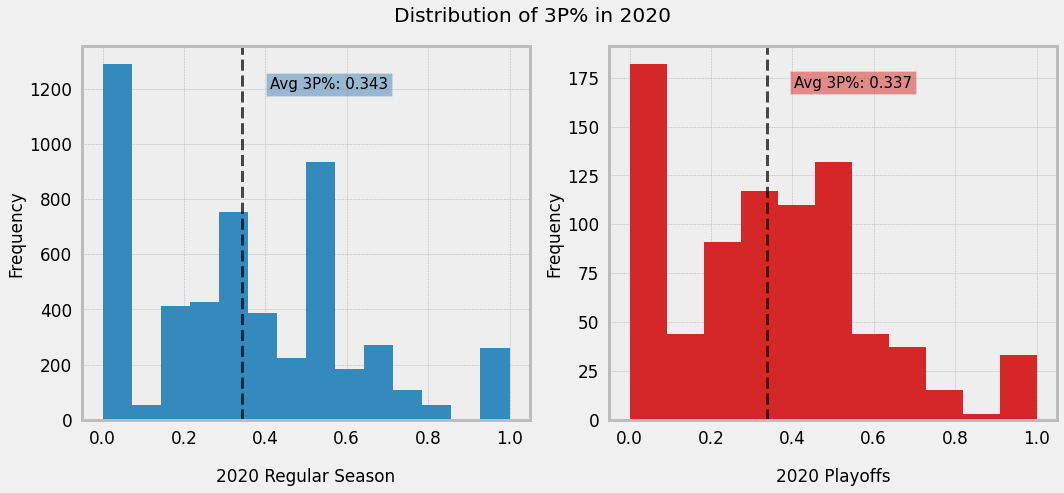

In [1672]:
fig, axs = plt.subplots(1,2, figsize=(15,7))


fig.suptitle('Distribution of 3P% in 2020',fontsize='x-large')
axs[0].hist(tsrs20['3P%'],bins=14)
axs[0].set_ylabel('Frequency',fontsize='large')
axs[0].set_xlabel('2020 Regular Season',fontsize='large')
axs[0].text(tsrs20['3P%'].mean()*1.2, 1200, 'Avg 3P%: {:.3f}'.format(tsrs20['3P%'].mean()),bbox=dict(facecolor='steelblue', alpha=0.5),fontsize=15)
axs[0].axvline(tsrs20['3P%'].mean(), color='k', linestyle='dashed', linewidth=3, alpha=0.7)
axs[0].xaxis.labelpad = 20


axs[1].hist(tsp20['3P%'],bins=11, color='tab:red')
axs[1].set_ylabel('Frequency',fontsize='large')
axs[1].set_xlabel('2020 Playoffs',fontsize='large')
axs[1].text(tsp20['3P%'].mean()*1.2, 170, 'Avg 3P%: {:.3f}'.format(tsp20['3P%'].mean()),bbox=dict(facecolor='tab:red', alpha=0.5),fontsize=15)
axs[1].axvline(tsp20['3P%'].mean(), color='k', linestyle='dashed', linewidth=3, alpha=0.7)
axs[1].xaxis.labelpad = 20

fig.tight_layout()

# Save Figures of Shooting Stat Comparisons

In [1813]:
def stat_comp(stat,filename):
    fig, axs = plt.subplots(1,2, figsize=(15,7))

    fig.suptitle('Distribution of {} in 2020'.format(stat),fontsize='x-large')
    axs[0].hist(tsrs20[stat],bins=20)
    axs[0].set_ylabel('Frequency',fontsize='large')
    axs[0].set_xlabel('2020 Regular Season',fontsize='large')
    axs[0].text(tsrs20[stat].mean()*1.2, 800, 'Avg {}: {:.2f}%'.format(stat,tsrs20[stat].mean()*100),bbox=dict(facecolor='steelblue', alpha=0.5),fontsize=15)
    axs[0].axvline(tsrs20[stat].mean(), color='k', linestyle='dashed', linewidth=3, alpha=0.7)
    axs[0].xaxis.labelpad = 20


    axs[1].hist(tsp20[stat],bins=20, color='tab:red')
    axs[1].set_ylabel('Frequency',fontsize='large')
    axs[1].set_xlabel('2020 Post Season',fontsize='large')
    axs[1].text(tsp20[stat].mean()*1.2, 140, 'Avg {}: {:.2f}%'.format(stat,tsp20[stat].mean()*100),bbox=dict(facecolor='tab:red', alpha=0.5),fontsize=15)
    axs[1].axvline(tsp20[stat].mean(), color='k', linestyle='dashed', linewidth=3, alpha=0.7)
    axs[1].xaxis.labelpad = 20
    
    #axs[0].set_yscale('log')
    #axs[1].set_yscale('log')
    fig.tight_layout()
    #plt.savefig(filename)

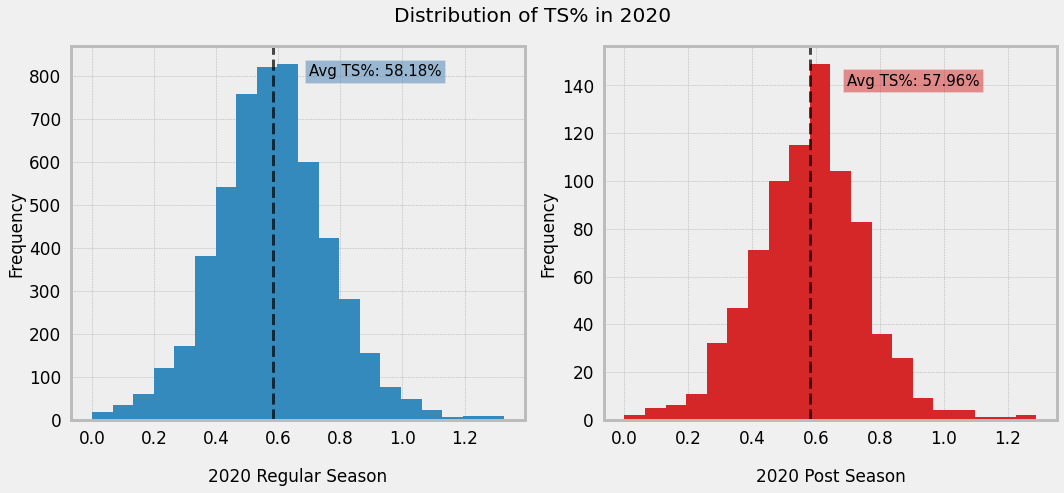

In [1814]:
stat_comp('TS%','TS% Comp')

# Shooting Stats T-Tests

In [1686]:
# h0: The average rate of 3-Pointers Attempted per game was the same in the Bubble, as it was outside
# Reject the null hypothesis, statistically signficant observation
# RS: 4.733
# PS: 5.163
stats.ttest_ind(tsrs20['3PA'],tsp20['3PA'],equal_var=False)

Ttest_indResult(statistic=-3.785169144133143, pvalue=0.00016228807865285548)

In [1815]:
print("FG:", stats.ttest_ind(tsrs20['FG'],tsp20['FG'],equal_var=False))

print("FGA:", stats.ttest_ind(tsrs20['FGA'],tsp20['FGA'],equal_var=False))

print("FG%:", stats.ttest_ind(tsrs20['FG%'],tsp20['FG%'],equal_var=False))

print("FT:", stats.ttest_ind(tsrs20['FT'],tsp20['FT'],equal_var=False))

print("FTA:", stats.ttest_ind(tsrs20['FTA'],tsp20['FTA'],equal_var=False))

print("FT%:", stats.ttest_ind(tsrs20['FT%'],tsp20['FT%'],equal_var=False))

print("3P:", stats.ttest_ind(tsrs20['3P'],tsp20['3P'],equal_var=False))

print("3PA:", stats.ttest_ind(tsrs20['3PA'],tsp20['3PA'],equal_var=False))

print("3P%:", stats.ttest_ind(tsrs20['3P%'],tsp20['3P%'],equal_var=False))

print("TSA:", stats.ttest_ind(tsrs20['TSA'],tsp20['TSA'],equal_var=False))

print("TS%:", stats.ttest_ind(tsrs20['TS%'],tsp20['TS%'],equal_var=False))

FG: Ttest_indResult(statistic=-1.253481926401538, pvalue=0.21031100971266276)
FGA: Ttest_indResult(statistic=-1.9707443116438985, pvalue=0.04901339706931795)
FG%: Ttest_indResult(statistic=1.5154107288489775, pvalue=0.12996004467384129)
FT: Ttest_indResult(statistic=-2.3950512166412063, pvalue=0.016792816904195373)
FTA: Ttest_indResult(statistic=-2.3191840624889526, pvalue=0.020576906738208556)
FT%: Ttest_indResult(statistic=-0.33220002652421743, pvalue=0.7398023768964648)
3P: Ttest_indResult(statistic=-1.9112116672298436, pvalue=0.056247773360592834)
3PA: Ttest_indResult(statistic=-3.785169144133143, pvalue=0.00016228807865285548)
3P%: Ttest_indResult(statistic=0.6154732663391103, pvalue=0.5383703760668487)
TSA: Ttest_indResult(statistic=-2.246850765054195, pvalue=0.024853997611800648)
TS%: Ttest_indResult(statistic=0.3291676080034232, pvalue=0.7420913687697093)


In [1171]:
avgtsrs20 = round(tsrs20.groupby('NAME').agg('mean'),3)
#avgtsrs20.reset_index(inplace=True)
avgtsrs20

,FG,FGA,FG%,FT,FTA,FT%,3P,3PA,3P%,TSA,TS%
NAME,,,,,,,,,,,
Aaron Gordon,5.648,12.815,0.432,2.796,4.148,0.695,1.185,3.926,0.278,14.646,0.516
Aaron Holiday,4.556,9.667,0.474,2.593,3.037,0.807,1.444,3.481,0.420,11.007,0.606
Abdel Nader,2.654,5.538,0.458,1.885,2.462,0.745,0.769,2.462,0.306,6.623,0.607
Al Horford,5.355,11.355,0.476,1.968,2.581,0.771,1.581,4.484,0.354,12.500,0.581
Al-Farouq Aminu,1.625,5.750,0.248,1.625,2.750,0.583,0.750,2.375,0.358,6.975,0.357
...,...,...,...,...,...,...,...,...,...,...,...
Wesley Matthews,2.864,6.636,0.420,2.364,3.091,0.772,1.727,4.500,0.337,8.000,0.589
Will Barton,5.884,13.093,0.437,2.302,3.023,0.746,1.744,5.093,0.342,14.428,0.543
Wilson Chandler,2.500,5.800,0.429,1.900,2.100,0.917,1.400,4.000,0.384,6.730,0.660


In [1170]:
avgtsp20 = round(tsp20.groupby('NAME').agg('mean'),3)
#avgtsp20.reset_index(inplace=True)
avgtsp20

,FG,FGA,FG%,FT,FTA,FT%,3P,3PA,3P%,TSA,TS%
NAME,,,,,,,,,,,
Aaron Holiday,3.500,5.000,0.700,1.500,2.500,0.666,1.000,2.000,0.500,6.100,0.778
Abdel Nader,1.000,6.000,0.167,1.000,2.000,0.500,1.000,5.000,0.200,6.900,0.290
Al Horford,3.500,7.500,0.400,2.000,3.500,0.334,0.000,1.500,0.000,9.000,0.486
Alec Burks,4.500,12.500,0.350,3.500,4.500,0.857,1.000,3.000,0.333,14.500,0.455
Alex Caruso,3.222,5.778,0.532,2.667,3.333,0.798,0.889,3.000,0.246,7.256,0.675
...,...,...,...,...,...,...,...,...,...,...,...
Tyler Johnson,8.000,15.000,0.533,2.000,2.000,1.000,5.000,9.000,0.556,15.900,0.723
Victor Oladipo,5.500,14.000,0.303,3.750,4.000,0.875,3.000,8.250,0.280,15.775,0.560
Wenyen Gabriel,4.000,5.000,0.800,1.000,2.000,0.500,1.000,1.000,1.000,5.900,0.847


In [1338]:
avgts20 = avgtsp20 - avgtsrs20
avgts20 = avgts20.dropna()
avgts20

,FG,FGA,FG%,FT,FTA,FT%,3P,3PA,3P%,TSA,TS%
NAME,,,,,,,,,,,
Aaron Holiday,-1.056,-4.667,0.226,-1.093,-0.537,-0.141,-0.444,-1.481,0.080,-4.907,0.172
Abdel Nader,-1.654,0.462,-0.291,-0.885,-0.462,-0.245,0.231,2.538,-0.106,0.277,-0.317
Al Horford,-1.855,-3.855,-0.076,0.032,0.919,-0.437,-1.581,-2.984,-0.354,-3.500,-0.095
Alec Burks,-0.250,1.667,-0.073,0.667,1.083,0.047,-0.833,-1.833,-0.069,2.150,-0.120
Alex Caruso,1.089,0.545,0.160,0.634,0.600,0.065,0.156,0.867,-0.073,0.809,0.136
...,...,...,...,...,...,...,...,...,...,...,...
Tyler Johnson,4.333,5.333,0.173,-1.000,-1.000,0.000,3.167,4.167,0.202,4.900,0.188
Victor Oladipo,0.438,2.188,-0.133,0.750,0.312,0.076,1.250,3.500,-0.091,2.325,-0.002
Wenyen Gabriel,1.000,0.667,0.029,-0.333,0.000,-0.167,0.000,-0.667,0.333,0.667,-0.071


(array([13., 39., 76.,  9.,  4.,  2.]),
 array([-0.6       , -0.33333333, -0.06666667,  0.2       ,  0.46666667,
         0.73333333,  1.        ]),
 <BarContainer object of 6 artists>)

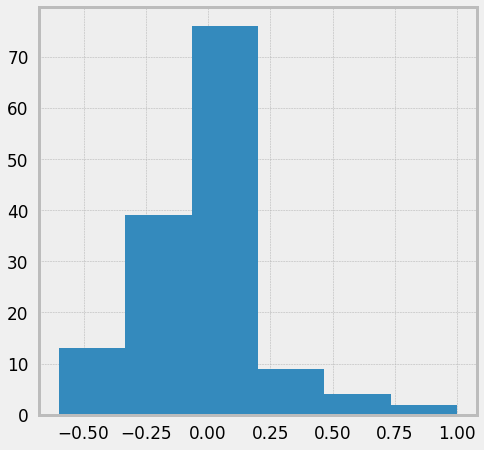

In [1822]:
fig,ax = plt.subplots()

ax.hist(avgts20['3P%'],bins=6)

# 18-19 Reg Season to Playoff Diff

In [1331]:
df5 = pd.read_csv('2018-2019 Game Log.csv')
df5 = df5.loc[:, ~df5.columns.str.contains('^Unnamed')]
#df5 = df5.drop(df5.columns[[0]], axis = 1)
cols5 = df5.columns.tolist()
cols5 = cols5[-1:] + cols5[:-1]
df5 = df5[cols5]
df5['TSA'] = round(df5['FGA']+0.44*df5['FTA'],1)
df5['TS%'] = round(df5['PTS']/(2*(df5['TSA'])),3)

#pd.set_option('display.max_columns', None)

df5

,NAME,DATE,AGE,TEAM,HOME/AWAY,OPPONENT,RESULT,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GAME_SCORE,+/-,TSA,TS%
0,Aron Baynes,2018-10-16,31-311,BOS,HOME,PHI,W (+18),0,19:14,3,7,0.429,2,4,0.5,0,0,NaN,3,1,4,3,0,0,1,3,8,6.6,8.0,7.0,0.571
1,Aron Baynes,2018-10-19,31-314,BOS,AWAY,TOR,L (-12),0,14:34,2,8,0.250,0,2,0.0,1,2,0.500,4,2,6,0,0,1,1,1,5,2.5,-2.0,8.9,0.281
2,Aron Baynes,2018-10-20,31-315,BOS,AWAY,NYK,W (+2),1,11:39,3,5,0.600,1,2,0.5,3,3,1.000,3,2,5,0,0,0,0,1,10,10.0,15.0,6.3,0.794
3,Aron Baynes,2018-10-30,31-325,BOS,HOME,DET,W (+3),0,12:09,3,5,0.600,1,2,0.5,2,2,1.000,0,5,5,1,0,0,0,4,9,7.3,9.0,5.9,0.763
4,Aron Baynes,2018-11-01,31-327,BOS,HOME,MIL,W (+4),0,15:34,1,5,0.200,1,5,0.2,2,4,0.500,0,3,3,2,0,0,0,1,5,3.0,-4.0,6.8,0.368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13028,Ekpe Udoh,2019-04-03,31-318,UTA,AWAY,PHO,W (+21),0,11:31,3,4,0.750,0,0,NaN,0,0,NaN,1,6,7,4,0,2,0,0,6,11.1,9.0,4.0,0.750
13029,Ekpe Udoh,2019-04-05,31-320,UTA,HOME,SAC,W (+21),0,15:29,3,4,0.750,0,0,NaN,1,2,0.500,2,6,8,1,2,0,0,3,7,9.7,8.0,4.9,0.714
13030,Ekpe Udoh,2019-04-07,31-322,UTA,AWAY,LAL,L (-4),0,11:54,1,1,1.000,0,0,NaN,1,3,0.333,1,0,1,1,1,1,0,1,3,4.6,-8.0,2.3,0.652
13031,Ekpe Udoh,2019-04-09,31-324,UTA,HOME,DEN,W (+10),0,1:31,0,0,NaN,0,0,NaN,0,0,NaN,0,1,1,0,0,0,2,0,0,-1.7,-6.0,0.0,NaN


In [1332]:
#18-19 Regular Season 
tsrs19=df5[['NAME','TEAM','DATE','FG','FGA','FG%','FT','FTA','FT%','3P','3PA','3P%','TSA','TS%']].dropna()

In [1333]:
#18-19 Playoffs
tsp19=df[['NAME','TEAM','DATE','FG','FGA','FG%','FT','FTA','FT%','3P','3PA','3P%','TSA','TS%']].dropna()

In [1334]:
tsrs19

,NAME,TEAM,DATE,FG,FGA,FG%,FT,FTA,FT%,3P,3PA,3P%,TSA,TS%
1,Aron Baynes,BOS,2018-10-19,2,8,0.250,1,2,0.50,0,2,0.000,8.9,0.281
2,Aron Baynes,BOS,2018-10-20,3,5,0.600,3,3,1.00,1,2,0.500,6.3,0.794
3,Aron Baynes,BOS,2018-10-30,3,5,0.600,2,2,1.00,1,2,0.500,5.9,0.763
4,Aron Baynes,BOS,2018-11-01,1,5,0.200,2,4,0.50,1,5,0.200,6.8,0.368
7,Aron Baynes,BOS,2018-11-08,1,6,0.167,2,2,1.00,0,1,0.000,6.9,0.290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12954,Thabo Sefolosha,UTA,2018-12-29,4,6,0.667,0,2,0.00,2,4,0.500,6.9,0.725
12957,Thabo Sefolosha,UTA,2019-01-05,2,4,0.500,2,2,1.00,0,1,0.000,4.9,0.612
12968,Thabo Sefolosha,UTA,2019-03-13,2,5,0.400,2,2,1.00,1,3,0.333,5.9,0.593
12974,Thabo Sefolosha,UTA,2019-03-27,3,5,0.600,3,4,0.75,2,4,0.500,6.8,0.809


In [1340]:
avgtsrs19 = round(tsrs19.groupby('NAME').agg('mean'),3)
#avgtsrs19.reset_index(inplace=True)
avgtsrs19

,FG,FGA,FG%,FT,FTA,FT%,3P,3PA,3P%,TSA,TS%
NAME,,,,,,,,,,,
Aaron Gordon,6.246,13.705,0.456,3.033,4.148,0.752,1.574,4.541,0.333,15.538,0.549
Aaron Holiday,3.118,6.941,0.455,2.412,2.941,0.825,1.294,3.882,0.373,8.241,0.637
Abdel Nader,2.750,5.938,0.457,1.562,2.062,0.688,0.938,2.750,0.379,6.844,0.584
Al Horford,6.032,11.581,0.534,2.161,2.645,0.796,1.452,3.484,0.380,12.752,0.621
Al-Farouq Aminu,3.333,7.500,0.439,2.685,3.111,0.881,1.241,3.648,0.349,8.881,0.600
...,...,...,...,...,...,...,...,...,...,...,...
Will Barton,4.654,11.615,0.392,2.192,2.846,0.714,1.538,4.615,0.304,12.873,0.495
Wilson Chandler,2.214,6.214,0.346,1.286,1.786,0.750,1.214,3.714,0.305,7.007,0.497
Zach Collins,3.297,6.297,0.496,2.081,2.730,0.721,0.757,2.000,0.309,7.503,0.616


In [1339]:
avgtsp19 = round(tsp19.groupby('NAME').agg('mean'),3)
#avgtsp19.reset_index(inplace=True)
avgtsp19

,FG,FGA,FG%,FT,FTA,FT%,3P,3PA,3P%,TSA,TS%
NAME,,,,,,,,,,,
Aaron Gordon,5.800,12.400,0.453,2.000,3.800,0.626,1.600,4.000,0.453,14.080,0.529
Al Horford,5.667,13.500,0.435,2.500,3.000,0.806,2.333,5.667,0.415,14.800,0.572
Al-Farouq Aminu,2.909,7.636,0.365,2.364,3.091,0.719,1.000,3.364,0.237,9.000,0.482
Alfonzo McKinnie,2.667,6.667,0.389,0.667,1.333,0.500,1.000,3.333,0.344,7.233,0.496
Andre Drummond,8.000,15.000,0.533,2.000,4.000,0.500,0.000,1.000,0.000,16.800,0.536
...,...,...,...,...,...,...,...,...,...,...,...
Tyreke Evans,5.250,12.000,0.454,2.000,3.500,0.500,2.750,5.000,0.545,13.575,0.576
Wayne Ellington,4.000,9.000,0.444,2.000,2.000,1.000,3.000,8.000,0.375,9.900,0.657
Wesley Matthews,3.000,7.000,0.429,3.000,3.000,1.000,2.000,4.000,0.500,8.300,0.663


In [1341]:
avgts19 = avgtsp19 - avgtsrs19
avgts19 = avgts19.dropna()
avgts19

,FG,FGA,FG%,FT,FTA,FT%,3P,3PA,3P%,TSA,TS%
NAME,,,,,,,,,,,
Aaron Gordon,-0.446,-1.305,-0.003,-1.033,-0.348,-0.126,0.026,-0.541,0.120,-1.458,-0.020
Al Horford,-0.365,1.919,-0.099,0.339,0.355,0.010,0.881,2.183,0.035,2.048,-0.049
Al-Farouq Aminu,-0.424,0.136,-0.074,-0.321,-0.020,-0.162,-0.241,-0.284,-0.112,0.119,-0.118
Alfonzo McKinnie,0.088,0.983,-0.116,-0.544,-0.878,-0.035,0.263,1.017,0.079,0.570,-0.078
Andre Drummond,0.400,-0.200,0.024,-1.560,-2.040,-0.092,-0.200,-0.320,-0.153,-1.064,0.003
...,...,...,...,...,...,...,...,...,...,...,...
Tyreke Evans,1.190,2.260,0.046,-0.280,0.340,-0.238,1.550,1.760,0.217,2.441,0.062
Wayne Ellington,-0.412,-1.529,0.038,-0.294,-0.882,0.165,-0.059,-0.529,0.044,-1.894,0.067
Wesley Matthews,-0.837,-2.878,0.040,0.306,-0.327,0.187,-0.061,-1.510,0.145,-3.051,0.118


In [1824]:
def ts_comparison(stat,filename):

    fig,ax = plt.subplots(figsize=(12,7))
    ymin, ymax = ax.get_ylim()
    ax.hist(avgts19[stat],bins=20,alpha=0.5,label='2019',zorder=2,color='tab:red')
    ax.hist(avgts20[stat],bins=20,alpha=0.5,label='2020',zorder=1,color='tab:blue')
    ax.legend(loc='upper left',fontsize='medium')

    ax.set_ylabel('Frequency',fontsize='large')
    ax.set_xlabel('{} Difference'.format(stat),fontsize='large')
    ax.set_title('Avg {} Difference from Regular Season to Post Season'.format(stat),fontsize='x-large',pad=15)

    #2019 Mean Difference
    ax.text(avgts19[stat].mean()+.1, 18, 'Avg {}: {:.3f}'.format(stat,avgts19[stat].mean()),bbox=dict(facecolor='tab:red', alpha=0.5),fontsize=15)
    ax.axvline(avgts19[stat].mean(), color='tab:red', linestyle='dashed', linewidth=3, alpha=0.7)

    #2020 Mean Difference
    ax.text(avgts20[stat].mean()-.4, 18, 'Avg {}: {:.3f}'.format(stat,avgts20[stat].mean()),bbox=dict(facecolor='steelblue', alpha=0.5),fontsize=15)
    ax.axvline(avgts20[stat].mean(), color='steelblue', linestyle='dashed', linewidth=3, alpha=0.7)

    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15
    fig.tight_layout()
    #plt.savefig(filename)

# FT% Comparison of Differences from Regular Season to Playoffs
## Pre Bubble vs Bubble

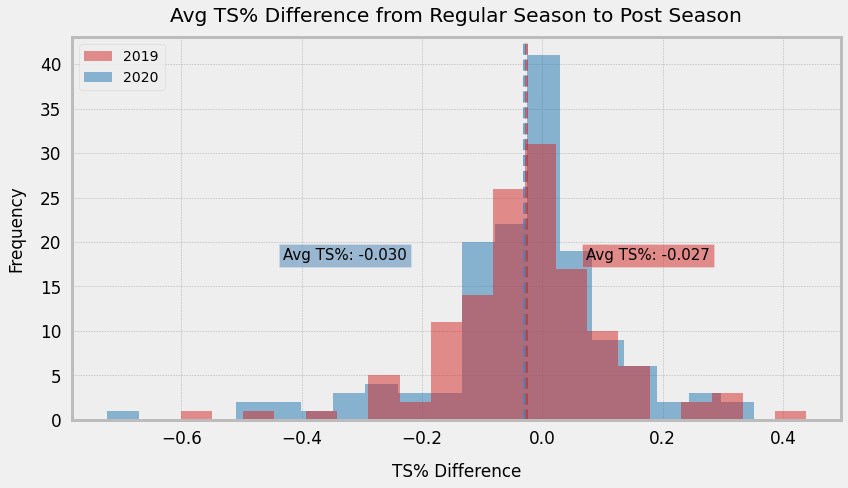

In [1825]:
ts_comparison('TS%','TS% Diff Comp')

# Stat Differences from Regular Season to Post Season

In [1787]:
#h0: There would not be a difference in statistics shifting from the Regular Season to the Post Season
# Fail to reject the h0
print("FG:", stats.ttest_ind(avgts19['FG'],avgts20['FG'],equal_var=False))

print("FGA:", stats.ttest_ind(avgts19['FGA'],avgts20['FGA'],equal_var=False))

print("FG%:", stats.ttest_ind(avgts19['FG%'],avgts20['FG%'],equal_var=False))

print("FT:", stats.ttest_ind(avgts19['FT'],avgts20['FT'],equal_var=False))

print("FTA:", stats.ttest_ind(avgts19['FTA'],avgts20['FTA'],equal_var=False))

print("FT%:", stats.ttest_ind(avgts19['FT%'],avgts20['FT%'],equal_var=False))

print("3P:", stats.ttest_ind(avgts19['3P'],avgts20['3P'],equal_var=False))

print("3PA:", stats.ttest_ind(avgts19['3PA'],avgts20['3PA'],equal_var=False))

print("3P%:", stats.ttest_ind(avgts19['3P%'],avgts20['3P%'],equal_var=False))

print("TSA:", stats.ttest_ind(avgts19['TSA'],avgts20['TSA'],equal_var=False))

print("TSA%:", stats.ttest_ind(avgts19['TS%'],avgts20['TS%'],equal_var=False))

FG: Ttest_indResult(statistic=0.741122229012441, pvalue=0.45925986229689464)
FGA: Ttest_indResult(statistic=1.402651251190749, pvalue=0.1618713036483851)
FG%: Ttest_indResult(statistic=0.252324520451822, pvalue=0.8009818112440673)
FT: Ttest_indResult(statistic=0.6273433607746545, pvalue=0.5309620775397894)
FTA: Ttest_indResult(statistic=0.10979382213593358, pvalue=0.9126551517531939)
FT%: Ttest_indResult(statistic=0.8301397093559076, pvalue=0.40722928908997835)
3P: Ttest_indResult(statistic=-0.2669052412850121, pvalue=0.789746140429409)
3PA: Ttest_indResult(statistic=-0.10232574140530643, pvalue=0.9185768935511842)
3P%: Ttest_indResult(statistic=-0.2991010702852391, pvalue=0.7650928993596061)
TSA: Ttest_indResult(statistic=1.3620649868916845, pvalue=0.17431564884996753)
TSA%: Ttest_indResult(statistic=0.1897717745108637, pvalue=0.849629588866731)


# FT% Comparison

In [1885]:
#2019-2020 REGULAR SEASON
ftrs20=df3[['NAME','TEAM','DATE','HOME/AWAY','FT','FTA','FT%','3P%','FG%']].dropna()
#2019-2020 PLAYOFFS
ftp20=df4[['NAME','TEAM','DATE','HOME/AWAY','FT','FTA','FT%','3P%','FG%']].dropna()

#2018-2019 Regular Season 
ftrs19=df5[['NAME','TEAM','DATE','HOME/AWAY','FT','FTA','FT%']].dropna()
#2018-2019 Playoffs
ftp19=df[['NAME','TEAM','DATE','HOME/AWAY','FT','FTA','FT%']].dropna()

# Increase in Shooting %'s from those below League Average
FT%: 0.773
3P%: 0.358
FG%: 0.46

In [1886]:
lowft = ftrs20.groupby('NAME').agg('mean')
lowft = lowft[lowft['FG%']>0.46]
lowft

,FT,FTA,FT%,3P%,FG%
NAME,,,,,
Aaron Holiday,2.592593,3.037037,0.806778,0.419852,0.474259
Al Horford,1.967742,2.580645,0.770968,0.353645,0.476323
Amir Coffey,2.500000,4.500000,0.312500,0.125000,0.563000
Anthony Davis,7.303571,8.607143,0.825482,0.288929,0.483161
Antonius Cleveland,0.000000,1.000000,0.000000,0.000000,0.667000
...,...,...,...,...,...
Tony Bradley,1.000000,1.500000,0.500000,1.000000,0.639000
Trevor Ariza,2.928571,3.357143,0.845857,0.446214,0.483500
Trey Burke,1.538462,2.000000,0.762846,0.471692,0.499154


In [1887]:
add = ftp20.groupby('NAME').agg('mean')
add = add-lowft
add = add.dropna()
add

,FT,FTA,FT%,3P%,FG%
NAME,,,,,
Aaron Holiday,-1.092593,-0.537037,-0.140278,0.080148,0.225741
Al Horford,0.032258,0.919355,-0.437468,-0.353645,-0.076323
Amir Coffey,-0.500000,-2.500000,0.687500,-0.125000,-0.563000
Anthony Davis,-0.145677,-0.080827,0.053202,0.104914,0.094208
Boban Marjanović,2.714286,3.000000,0.190143,-0.285714,-0.631143
...,...,...,...,...,...
Steven Adams,1.000000,1.500000,0.250000,-0.500000,-0.058000
T.J. Warren,1.462963,0.796296,0.196167,-0.090926,-0.062389
Tobias Harris,0.897541,1.209016,0.054619,-0.260049,-0.087848


(array([ 2.,  4.,  0.,  1.,  4.,  6., 19., 23.,  5.,  3.]),
 array([-0.63114286, -0.5454545 , -0.45976614, -0.37407778, -0.28838942,
        -0.20270106, -0.1170127 , -0.03132434,  0.05436402,  0.14005238,
         0.22574074]),
 <BarContainer object of 10 artists>)

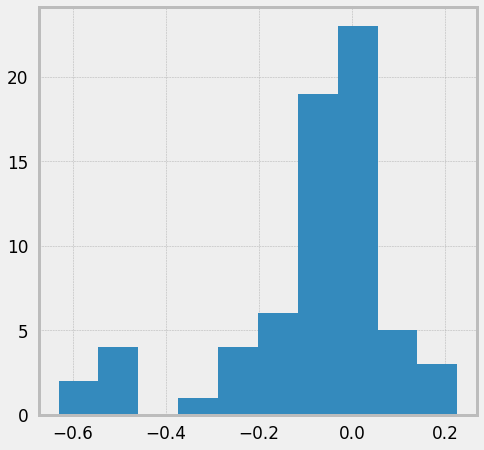

In [1888]:
fig, ax = plt.subplots()
ax.hist(add['FG%'],bins=10)
#ax.set_yscale('log')

In [1650]:
#2019, Home/Away, Regular/PS
hftrs19 = ftrs19[ftrs19['HOME/AWAY']=='HOME']
aftrs19 = ftrs19[ftrs19['HOME/AWAY']=='AWAY']
hftp19 = ftp19[ftp19['HOME/AWAY']=='HOME']
aftp19 = ftp19[ftp19['HOME/AWAY']=='AWAY']

#2020, Home/Away, Regular/PS
hftrs20 = ftrs20[ftrs20['HOME/AWAY']=='HOME']
aftrs20 = ftrs20[ftrs20['HOME/AWAY']=='AWAY']
hftp20 = ftp20[ftp20['HOME/AWAY']=='HOME']
aftp20 = ftp20[ftp20['HOME/AWAY']=='AWAY']

In [ ]:
hrs = [np.mean(hftrs19['FT%']), np.mean(hftrs20['FT%'])]
ars = [np.mean(aftrs19['FT%']), np.mean(aftrs20['FT%'])]
hps = [np.mean(hftp19['FT%']),np.mean(hftp20['FT%'])]
aps = [np.mean(aftp19['FT%']),np.mean(aftp20['FT%'])]

In [1904]:
def ft_comparison(data1,data2,stat,filename):

    fig,ax = plt.subplots(figsize=(12,7))
    #ymin, ymax = axget_ylim()
    
    ax.hist(data1[stat],bins=10,alpha=0.5,label='2020 Post',zorder=2)
    ax.hist(data2[stat],bins=10,alpha=0.5,label='Away Reg',zorder=1)
    ax.legend(loc='upper left',fontsize='medium')

    ax.set_ylabel('Frequency',fontsize='large')
    ax.set_xlabel('{}'.format(stat),fontsize='large')
    ax.set_title('Avg {} in 2020 Regular Season and Post Season'.format(stat),fontsize='large',pad=15)

    #data1, blue graph
    ax.text(data1[stat].mean()+.05, 700, 'Avg {}: {:.3f}'.format(stat,data1[stat].mean()*100),bbox=dict(facecolor='steelblue', alpha=0.5),fontsize=15)
    ax.axvline(data1[stat].mean(), color='royalblue', linestyle='dashed', linewidth=3, alpha=0.7)

    #data2, red graph 
    ax.text(data2[stat].mean()-0.25, 700, 'Avg {}: {:.3f}%'.format(stat,data2[stat].mean()*100),bbox=dict(facecolor='tab:red', alpha=0.3),fontsize=15)
    ax.axvline(data2[stat].mean(), color='red', linestyle='dashed', linewidth=3, alpha=0.7)
    
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.set_yscale('log')
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15
    fig.tight_layout()
    fig.savefig(filename)


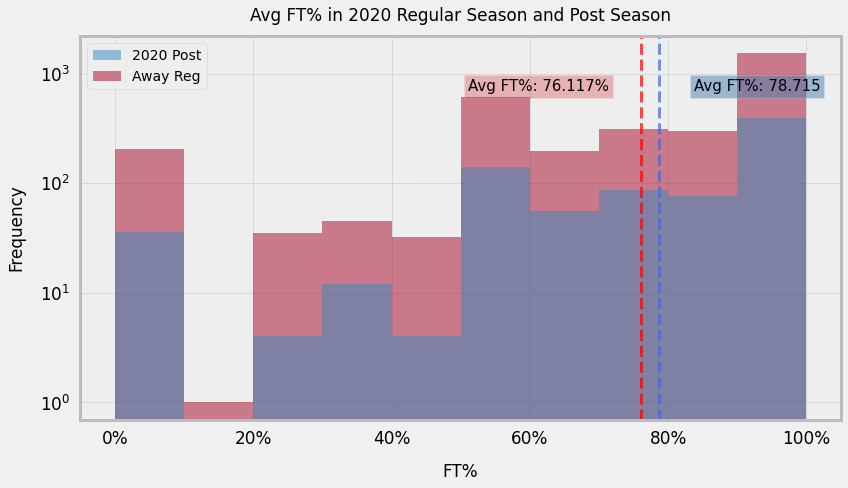

In [1905]:
ft_comparison(ftp20,aftrs20,'FT%','Avg FT% in 2020 Regular Season Away Games and 2020 Post Season Games')

In [1860]:
# H0: FT% inside the 2020 Bubble is the same as FT% during the 2020 Regular Season
# We fail to reject the H0
stats.ttest_ind(ftp20['FT%'],aftrs20['FT%'],equal_var=False)

Ttest_indResult(statistic=0.7187252411201444, pvalue=0.47241689744848236)

/Users/tiffanygarcia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


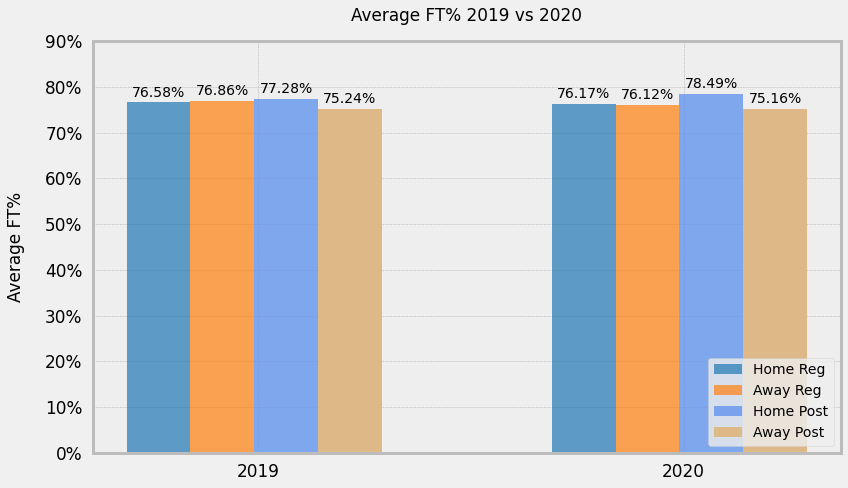

In [1920]:
fig,ax = plt.subplots(figsize=(12,7))

labels = ['2019','2020']
x=np.arange(len(labels))
width=0.15


hrs = [np.mean(hftrs19['FT%']), np.mean(hftrs20['FT%'])]
ars = [np.mean(aftrs19['FT%']), np.mean(aftrs20['FT%'])]
hps = [np.mean(hftp19['FT%']),np.mean(hftp20['FT%'])]
aps = [np.mean(aftp19['FT%']),np.mean(aftp20['FT%'])]


rects1 = ax.bar(x,hrs, width, color='tab:blue',label='Home Reg',alpha=0.7)
rects2 = ax.bar(x+width,ars, width, color='tab:orange',label='Away Reg',alpha=0.7)
rects3 = ax.bar(x+(2*width),hps, width, color='cornflowerblue',label='Home Post',alpha=0.8)
rects4 = ax.bar(x+(3*width),aps, width, color='burlywood',label='Away Post')

ax.set_ylim(0,0.9)
ax.set_ylabel('Average FT%',labelpad=20)
ax.set_xticklabels(labels)
ax.set_title('Average FT% 2019 vs 2020',pad=20)
ax.set_xticks(x+0.235)

plt.locator_params(axis='y',integer=True)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.legend(loc=4,fontsize='medium')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4}%'.format(height*100),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)


fig.tight_layout()
#fig.savefig('Average FT% 2019 vs 2020')



Ttest_indResult(statistic=-1.7560300029622722, pvalue=0.07955854829435996)